In [68]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv('diabetes.csv')

In [57]:
df = df[df['BMI'] != 0]
df = df[df['Glucose'] != 0]
df = df[df['BloodPressure'] != 0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
177,0,129,110,46,130,67.1,0.319,26,1
247,0,165,90,33,680,52.3,0.427,23,0
303,5,115,98,0,0,52.9,0.209,28,1
445,0,180,78,63,14,59.4,2.420,25,1
673,3,123,100,35,240,57.3,0.880,22,0


In [62]:
X = df.loc[:, df.columns != 'BMI']
y = df['BMI']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.25,
    random_state = 5
)

Untuned Model

In [67]:
xg_reg = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators = 10,
    seed = 25
)

xg_reg.fit(X_train, y_train)

print('Score:', xg_reg.score(X_test, y_test))

Score: 0.3082950777678569


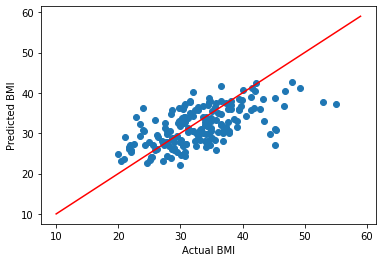

In [73]:
y_pred_test_xg = xg_reg.predict(X_test)
plt.scatter(y_test, y_pred_test_xg)
plt.ylabel('Predicted BMI')
plt.xlabel('Actual BMI')
plt.plot(range(10, 60),range(10, 60), color='red');

Tuned Model

In [74]:
from sklearn.model_selection import GridSearchCV
# create DMatrix

xgb.DMatrix(
    data = X,
    label = y
)
# parameter grid
gbm_param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'subsample': [0.3, 0.5, 0.7],
    'n_estimators': [40, 50],
    'max_depth': [4, 6]
    }
# regressor instance
gbm = xgb.XGBRegressor()

grid_mse = GridSearchCV(
    estimator = gbm,
    param_grid = gbm_param_grid,
    scoring = 'r2',
    cv = 4,
    verbose = 1
)
grid_mse.fit(X, y)
print('Best params', grid_mse.best_params_)
print('Best score:', grid_mse.best_score_)

Fitting 4 folds for each of 108 candidates, totalling 432 fits
Best params {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.7}
Best score: 0.3791529273903601


Linear Regression

In [76]:
# Instantiate Linear Regression object
lr = LinearRegression()

# Fit
lr.fit(X_train, y_train)

# Make predictions
lr_preds = lr.predict(X_test)

# Score
print('Score: ', lr.score(X_test, y_test))

Score:  0.18933831815549462


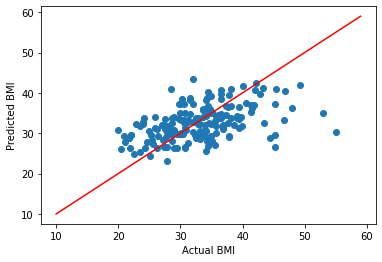

In [79]:
plt.scatter(y_test, lr_preds)
plt.ylabel('Predicted BMI')
plt.xlabel('Actual BMI')
plt.plot(range(10,60),range(10,60), color='red');

Feature Importance

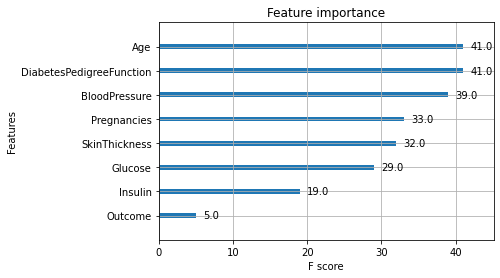

In [82]:
xgb.plot_importance(xg_reg);